In [28]:
import numpy as np
import pandas as pd
from pandas import read_csv
dataset = read_csv('data.csv',';')
dataset = dataset.drop(['Unnamed: 10','Unnamed: 11'], axis=1)
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [29]:
dataset.corr(method='pearson') 

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [30]:
# k_corr>95% x1 <-> x2 x4 <-> x5 y1 <-> y2
# k_corr(x4,y) < k_corr(x5,y) k_corr(x1,y) < k_corr(x2,y) 
# can pay no attention to x1, x4
dataset = dataset.drop(['X1','X4'], axis=1)
dataset.head()

,X2,X3,X5,X6,X7,X8,Y1,Y2
0,514.5,294.0,7.0,2,0.0,0,15.55,21.33
1,514.5,294.0,7.0,3,0.0,0,15.55,21.33
2,514.5,294.0,7.0,4,0.0,0,15.55,21.33
3,514.5,294.0,7.0,5,0.0,0,15.55,21.33
4,563.5,318.5,7.0,2,0.0,0,20.84,28.28


In [31]:
target = dataset[['Y1','Y2']]
features = dataset.drop(['Y1','Y2'], axis=1)

In [32]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(features, target) 
print('interect = ', slr.intercept_) #b0
print('coef = ', slr.coef_) #b1 for x[i]

interect =  [-33.99086431 -31.71543496]
coef =  [[ 1.53836106e-02  3.69448743e-02  5.53040787e+00 -2.33281250e-02
   1.99326802e+01  2.03771772e-01]
 [ 2.39613302e-02  1.85976539e-02  5.77062039e+00  1.21510417e-01
   1.47170683e+01  4.06972598e-02]]


In [33]:
target1 = dataset['Y1']
slr1 = LinearRegression()
slr1.fit(features, target1) 
print('interect = ', slr1.intercept_) #b0
print('coef = ', slr1.coef_) #b1 for x[i]

target2 = dataset['Y2']
slr2 = LinearRegression()
slr2.fit(features, target2) 
print('interect = ', slr2.intercept_) #b0
print('coef = ', slr2.coef_) #b1 for x[i]

interect =  -33.990864310821735
coef =  [ 1.53836106e-02  3.69448743e-02  5.53040787e+00 -2.33281250e-02
  1.99326802e+01  2.03771772e-01]
interect =  -31.715434961438554
coef =  [ 0.02396133  0.01859765  5.77062039  0.12151042 14.71706832  0.04069726]


In [34]:
#trying to decomposition to flat situation
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca.fit(features)
dec_features = pca.transform(features)
pca.fit(target)
dec_target = pca.transform(target)
print(dec_target.shape[0])

768


interect =  [-5.1864073e-15]
coef =  [[0.09837613]]


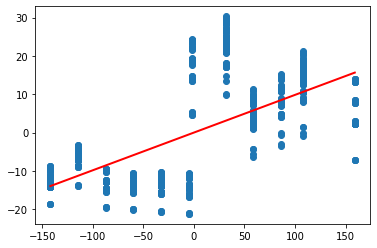

In [35]:
import matplotlib.pyplot as plt
dec_slr = LinearRegression()
dec_slr.fit(dec_features, dec_target) 
print('interect = ', dec_slr.intercept_) #b0
print('coef = ', dec_slr.coef_) #b1 for x[i]
#pic1
plt.scatter(dec_features, dec_target)
plt.plot(dec_features, dec_slr.predict(dec_features), color='red', linewidth=2);

In [36]:
X = dataset[['X2']]

interect =  72.94538243006991
coef =  [-0.07538716]


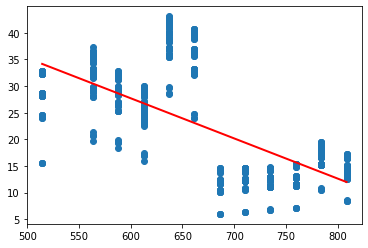

In [37]:
import matplotlib.pyplot as plt
Y1_slr = LinearRegression()
Y1_slr.fit(X, target1) 
print('interect = ', Y1_slr.intercept_) #b0
print('coef = ', Y1_slr.coef_) #b1 for x[i]
#pic2
plt.scatter(X, target1)
plt.plot(X, Y1_slr.predict(X), color='red', linewidth=2);

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, target1, test_size=0.2, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 54.498, test: 70.192
R^2 train: 0.452, test: 0.364


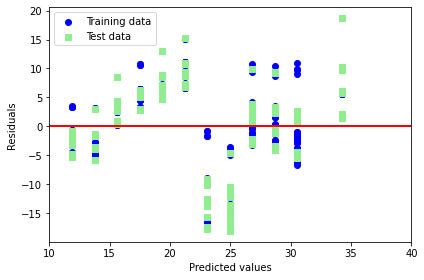

In [39]:
#pic3
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=10, xmax=40, lw=2, color='red')
plt.xlim([10, 40])
plt.tight_layout()

In [40]:
import statsmodels.api as sml
from statsmodels import tools

features_new = tools.add_constant(features)

regressor_OLS = sml.OLS(endog = target1,exog =  features_new).fit()

regressor_OLS.summary()

OLS Regression Results 
 
 Dep. Variable: Y1 R-squared: 0.912 
 
 
 Model: OLS Adj. R-squared: 0.911 
 
 
 Method: Least Squares F-statistic: 1312. 
 
 
 Date: Wed, 09 Jun 2021 Prob (F-statistic): 0.00 
 
 
 Time: 18:17:39 Log-Likelihood: -1932.0 
 
 
 No. Observations: 768 AIC: 3878. 
 
 
 Df Residuals: 761 BIC: 3910. 
 
 
 Df Model: 6 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const -33.9909 3.383 -10.048 0.000 -40.632 -27.350 
 
 
 X2 0.0154 0.005 2.968 0.003 0.005 0.026 
 
 
 X3 0.0369 0.006 6.600 0.000 0.026 0.048 
 
 
 X5 5.5304 0.266 20.761 0.000 5.007 6.053 
 
 
 X6 -0.0233 0.097 -0.240 0.810 -0.214 0.167 
 
 
 X7 19.9327 0.834 23.889 0.000 18.295 21.571 
 
 
 X8 0.2038 0.072 2.843 0.005 0.063 0.344 
 
 
 
 
 Omnibus: 12.447 Durbin-Watson: 0.586 
 
 
 Prob(Omnibus): 0.002 Jarque-Bera (JB): 20.499 
 
 
 Skew: 0.065 Prob(JB): 3.54e-05 
 
 
 Kurtosis: 3.790 Cond. No. 2.34e+04 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.34e+04. This might indicate that there are strong multicollinearity or other numerical problems.

In [41]:
import statsmodels.api as sml
from statsmodels import tools

features_new = tools.add_constant(features)

regressor_OLS = sml.OLS(endog = target2,exog =  features_new).fit()

regressor_OLS.summary()

OLS Regression Results 
 
 Dep. Variable: Y2 R-squared: 0.882 
 
 
 Model: OLS Adj. R-squared: 0.881 
 
 
 Method: Least Squares F-statistic: 947.4 
 
 
 Date: Wed, 09 Jun 2021 Prob (F-statistic): 0.00 
 
 
 Time: 18:17:39 Log-Likelihood: -1998.9 
 
 
 No. Observations: 768 AIC: 4012. 
 
 
 Df Residuals: 761 BIC: 4044. 
 
 
 Df Model: 6 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const -31.7154 3.691 -8.593 0.000 -38.961 -24.470 
 
 
 X2 0.0240 0.006 4.238 0.000 0.013 0.035 
 
 
 X3 0.0186 0.006 3.045 0.002 0.007 0.031 
 
 
 X5 5.7706 0.291 19.855 0.000 5.200 6.341 
 
 
 X6 0.1215 0.106 1.147 0.252 -0.086 0.329 
 
 
 X7 14.7171 0.910 16.166 0.000 12.930 16.504 
 
 
 X8 0.0407 0.078 0.520 0.603 -0.113 0.194 
 
 
 
 
 Omnibus: 79.669 Durbin-Watson: 1.009 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 164.424 
 
 
 Skew: 0.620 Prob(JB): 1.98e-36 
 
 
 Kurtosis: 4.897 Cond. No. 2.34e+04 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.34e+04. This might indicate that there are strong multicollinearity or other numerical problems.